# Logistic Regression for Mobility Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('Data/Preprocessed_Data_with_Label.csv', encoding='latin1')
print(data.shape)

(4701, 1660)


## Correlation study

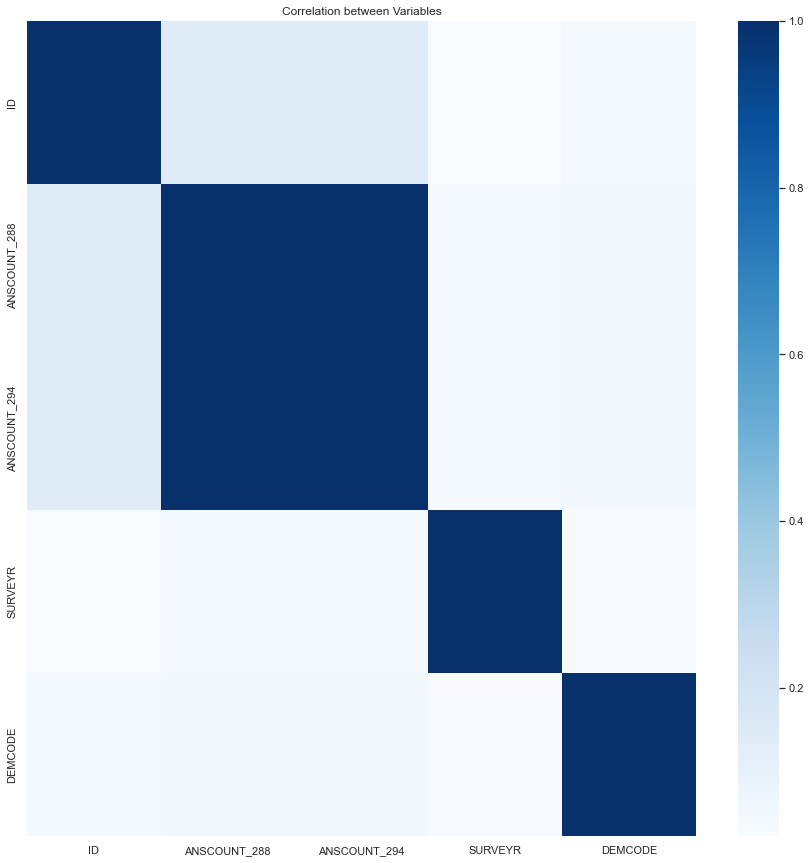

In [127]:
corr = data.iloc[:, :60].corr()
# corr = X_train[X_train.columns[Features_per_Model[-1]]].corr()
corr = data[['ID', 'ANSCOUNT_288', 'ANSCOUNT_294', 'SURVEYR', 'DEMCODE']].corr()
corr = np.abs(corr)
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, annot=False, ax=ax, cmap="Blues"); 
ax.set_title("Correlation between Variables");

## Split Dataset

In [3]:
labels           = data.columns[616:635]
label_to_predict = labels[0]# Predicting the percentage of people that wants to leave their job

In [6]:
from verstack.stratified_continuous_split import scsplit

In [7]:
X_train, X_test, y_train, y_test = scsplit(data.drop(columns=labels), data[label_to_predict],
                                           stratify=data[label_to_predict],
                                           train_size=0.8, test_size=0.2,
                                            continuous = False) # tested

### Select k features

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [70]:
def RMSE(y_test, y_pred):
    return np.sqrt(np.mean((y_pred-y_test)**2))

In [90]:
num_features       = [50, 40, 30, 20, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
RMSE_per_Model     = []
Features_per_Model = []

for k in num_features:
    print("Searching for {0} discriminant features\n".format(k))
    logreg = LogisticRegression()

    rfe    = RFE(logreg, n_features_to_select=k, step=200, verbose=1)
    rfe    = rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    
    ## Stores the RMSE on test dataset per model
    RMSE_i = RMSE(y_test, y_pred)
    RMSE_per_Model.append(RMSE_i)
    print("\nRMSE for model with {0} features: {1}".format(k, RMSE_i))
    
    Features_per_Model = Features_per_Model + [rfe.support_]
    print()

Searching for 50 discriminant features

Fitting estimator with 1641 features.
Fitting estimator with 1441 features.
Fitting estimator with 1241 features.
Fitting estimator with 1041 features.
Fitting estimator with 841 features.
Fitting estimator with 641 features.
Fitting estimator with 441 features.
Fitting estimator with 241 features.

RMSE for model with 50 features: 9.921262817705257

Searching for 40 discriminant features

Fitting estimator with 1641 features.
Fitting estimator with 1441 features.
Fitting estimator with 1241 features.
Fitting estimator with 1041 features.
Fitting estimator with 841 features.
Fitting estimator with 641 features.
Fitting estimator with 441 features.
Fitting estimator with 241 features.
Fitting estimator with 41 features.

RMSE for model with 40 features: 9.768140975047162

Searching for 30 discriminant features

Fitting estimator with 1641 features.
Fitting estimator with 1441 features.
Fitting estimator with 1241 features.
Fitting estimator with 1

[]

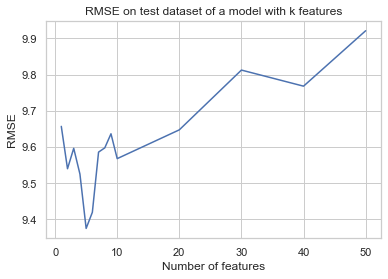

In [91]:
plt.plot(num_features, RMSE_per_Model)
plt.title("RMSE on test dataset of a model with k features")
plt.ylabel("RMSE")
plt.xlabel("Number of features")
plt.plot()

#### Visualize the features selected for the best model

In [120]:
selected_features = X_train.columns[Features_per_Model[-5]]# Feature Filter
X_train[selected_features].columns

Index(['ID', 'ANSCOUNT_288', 'ANSCOUNT_294', 'SURVEYR', 'DEMCODE'], dtype='object')

In [121]:
sum(Features_per_Model[-5])

5

In [122]:
logreg = LogisticRegression()
result = logreg.fit(X_train[selected_features], y_train)

In [123]:
y_pred = logreg.predict(X_test[selected_features])

In [124]:
print("The best value of ", RMSE(y_test, y_pred))

9.375108926040957

#### Get the p-values for each model

In [139]:
import statsmodels.api as sm

for selected_features in [X_train.columns[Features_per_Model[-i]] for i in range (1, 11)]:
    logit_model=sm.Logit(y_train/100, X_train[selected_features])
    result=logit_model.fit()
    print(result.summary())

Optimization terminated successfully.
         Current function value: 0.528260
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3760
Model:                          Logit   Df Residuals:                     3759
Method:                           MLE   Df Model:                            0
Date:                Sat, 05 Feb 2022   Pseudo R-squ.:                  -5.613
Time:                        19:11:05   Log-Likelihood:                -1986.3
converged:                       True   LL-Null:                       -300.37
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DEMCODE       -0.0004   1.76e-05    -24.755      0.000      -0.000      -0.000
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.528014
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3760
Model:                          Logit   Df Residuals:                     3750
Method:                           MLE   Df Model:                            9
Date:                Sat, 05 Feb 2022   Pseudo R-squ.:                  -5.610
Time:                        19:11:05   Log-Likelihood:                -1985.3
converged:                       True   LL-Null:                       -300.37
Covariance Type:            nonrobust   LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ID           -2.193e-08    1.2e-06     -0.018      0.985   -2.37e-06    2.33e-06
ANSCOUNT_137    -0.0003